In [1]:
import os, sys, io
import folium

def load_src(name, fpath):
    import os, imp
    p = fpath if os.path.isabs(fpath) \
        else os.path.join(os.path.dirname(os.path.abspath('')), fpath)
    return imp.load_source(name, p)
load_src("utils", "utils/__init__.py")
import utils

In [2]:
data_path = '../../data'
train_file = os.path.join(data_path, 'train-1000.csv')
results_path = '../../results/task2'
utils.create_dir(results_path)
colors_list = utils.get_color_list()['bog']
ftiles = utils.get_map_tiles()

In [3]:
PLOT_LINES = False
SAVE_IMAGES = True
SAVE_INDIVIDUAL = True

In [4]:
train1000 = utils.get_train1000_df(train_file)

In [5]:
train1000.head()

,POLYLINE
0,"[[-8.618643, 41.141412], [-8.618499, 41.141376..."
1,"[[-8.639847, 41.159826], [-8.640351, 41.159871..."
2,"[[-8.612964, 41.140359], [-8.613378, 41.14035]..."
3,"[[-8.574678, 41.151951], [-8.574705, 41.151942..."
4,"[[-8.645994, 41.18049], [-8.645949, 41.180517]..."


In [6]:
lsdf = utils.get_lineString_gdf(train1000)

Insufficient points to form LineString. Coords only have 1 point.
Insufficient points to form LineString. Coords only have 1 point.
Insufficient points to form LineString. Coords only have 1 point.
Insufficient points to form LineString. Coords only have 1 point.
Insufficient points to form LineString. Coords only have 1 point.
Insufficient points to form LineString. Coords only have 1 point.
Insufficient points to form LineString. Coords only have 1 point.
Insufficient points to form LineString. Coords only have 1 point.
Missing coordinates at row 762!
[]
Insufficient points to form LineString. Coords only have 1 point.
Total number of LineString: 990


<AxesSubplot:>

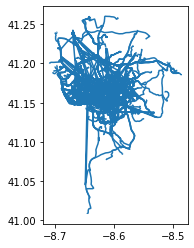

In [7]:
lsdf.plot()

In [8]:
lcoords = utils.get_lineString_coords(lsdf)

In [9]:
lcoords

0      [(41.141412, -8.618643), (41.141376, -8.618499...
1      [(41.159826, -8.639847), (41.159871, -8.640351...
2      [(41.140359, -8.612964), (41.14035, -8.613378)...
3      [(41.151951, -8.574678), (41.151942, -8.574705...
4      [(41.18049, -8.645994), (41.180517, -8.645949)...
                             ...                        
985    [(41.143113, -8.611398), (41.143167, -8.610714...
986    [(41.161023, -8.628984), (41.160996, -8.628894...
987    [(41.148531, -8.585775), (41.14863, -8.58582),...
988    [(41.147955, -8.606601), (41.14791, -8.606457)...
989    [(41.182704, -8.600112), (41.182704, -8.599743...
Length: 990, dtype: object

In [10]:
f = folium.Figure(width=1500, height=1000)
fmap = folium.Map(utils.get_porto_coords(), zoom_start=13, tiles=ftiles[1], zoom_control = False, max_bounds=True).add_to(f)
bounds = utils.get_global_xy_bounds(lcoords[:10])
fmap.fit_bounds(bounds)

PLOT_LINES = False
for idx, lcoord in enumerate(lcoords[:10]):
    feature_group = folium.FeatureGroup()
    if PLOT_LINES:
        feature_group.add_child(folium.PolyLine(lcoord, color=colors_list[idx], weight=3))
    for p in lcoord:
        feature_group.add_child(folium.Circle(p, radius=5, color=colors_list[idx], fill=True, fill_color=colors_list[idx], fill_opacity=1))
    fmap.add_child(feature_group)    
# fmap.fit_bounds(feature_group.get_bounds());

fmap

In [11]:
if SAVE_IMAGES:
    utils.save_fmap_plot(fmap, os.path.join(results_path, 'fmap_gps_all'))

In [ ]:
if SAVE_INDIVIDUAL:
    fi = 1
    PLOT_LINES = True
    for idx, lcoord in enumerate(lcoords[:10]):
        fmap = folium.Map(utils.get_porto_coords(), zoom_start=14, tiles=ftiles[fi], zoom_control = False)
        bounds = utils.get_xy_bounds(lcoord)
        fmap.fit_bounds(bounds)
        feature_group = folium.FeatureGroup()
        if PLOT_LINES:
            feature_group.add_child(folium.PolyLine(lcoord, color=colors_list[idx], weight=3))
        for p in lcoord:
            feature_group.add_child(folium.Circle(p, radius=5, color=colors_list[idx], fill=True, fill_color=colors_list[idx], fill_opacity=1))
        fmap.add_child(feature_group)
        utils.save_fmap_plot(fmap, os.path.join(results_path, f'fmap{fi}_gps_{idx}'))

In [ ]:
idx = 8
fi = 0
PLOT_LINES = False
lcoord = lcoords[idx]
fmap = folium.Map(utils.get_porto_coords(), zoom_start=14, tiles=ftiles[fi], zoom_control = False)
bounds = utils.get_xy_bounds(lcoord)
fmap.fit_bounds(bounds)
feature_group = folium.FeatureGroup()
if PLOT_LINES:
    feature_group.add_child(folium.PolyLine(lcoord, color=colors_list[idx], weight=3))
for p in lcoord:
    feature_group.add_child(folium.Circle(p, radius=10, color=colors_list[idx], fill=True, fill_color=colors_list[idx], fill_opacity=1))
fmap.add_child(feature_group)
fmap
utils.save_fmap_plot(fmap, os.path.join(results_path, f'fmap{fi}_gpspts_{idx}'))